In [1]:
%matplotlib widget
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("fern.JPG", -1)
mask = img[..., -1]
img = img[..., :3]

img = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=0)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_xy = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel_gray_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_gray_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
sobel_gray_xy = cv2.Sobel(img_gray, cv2.CV_64F, 1, 1, ksize=5)
gradient_gray = np.abs(sobel_gray_x) + np.abs(sobel_gray_y)

gradient = np.abs(sobel_x) + np.abs(sobel_y)
# gradient = gradient.max() - gradient

In [3]:
mask = cv2.GaussianBlur(mask, ksize=(15, 15), sigmaX=0)
mask = mask.astype(np.float32) / 255.0

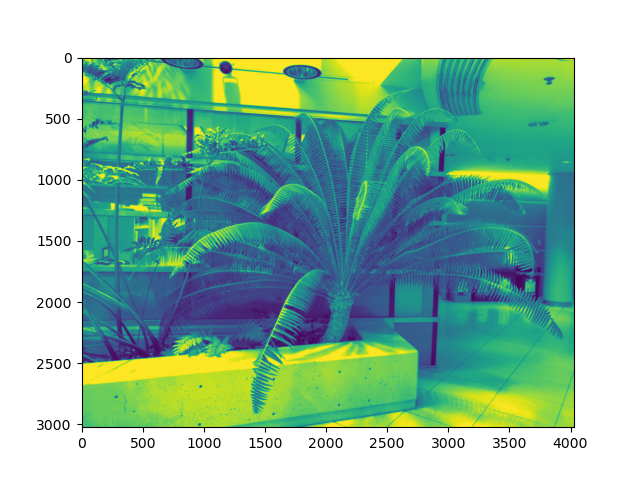

In [4]:
plt.figure()
plt.imshow(mask)

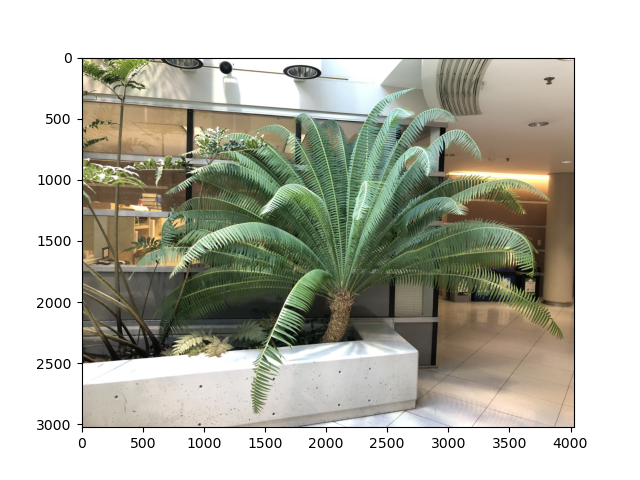

In [5]:
plt.figure()
plt.imshow(img[..., ::-1])


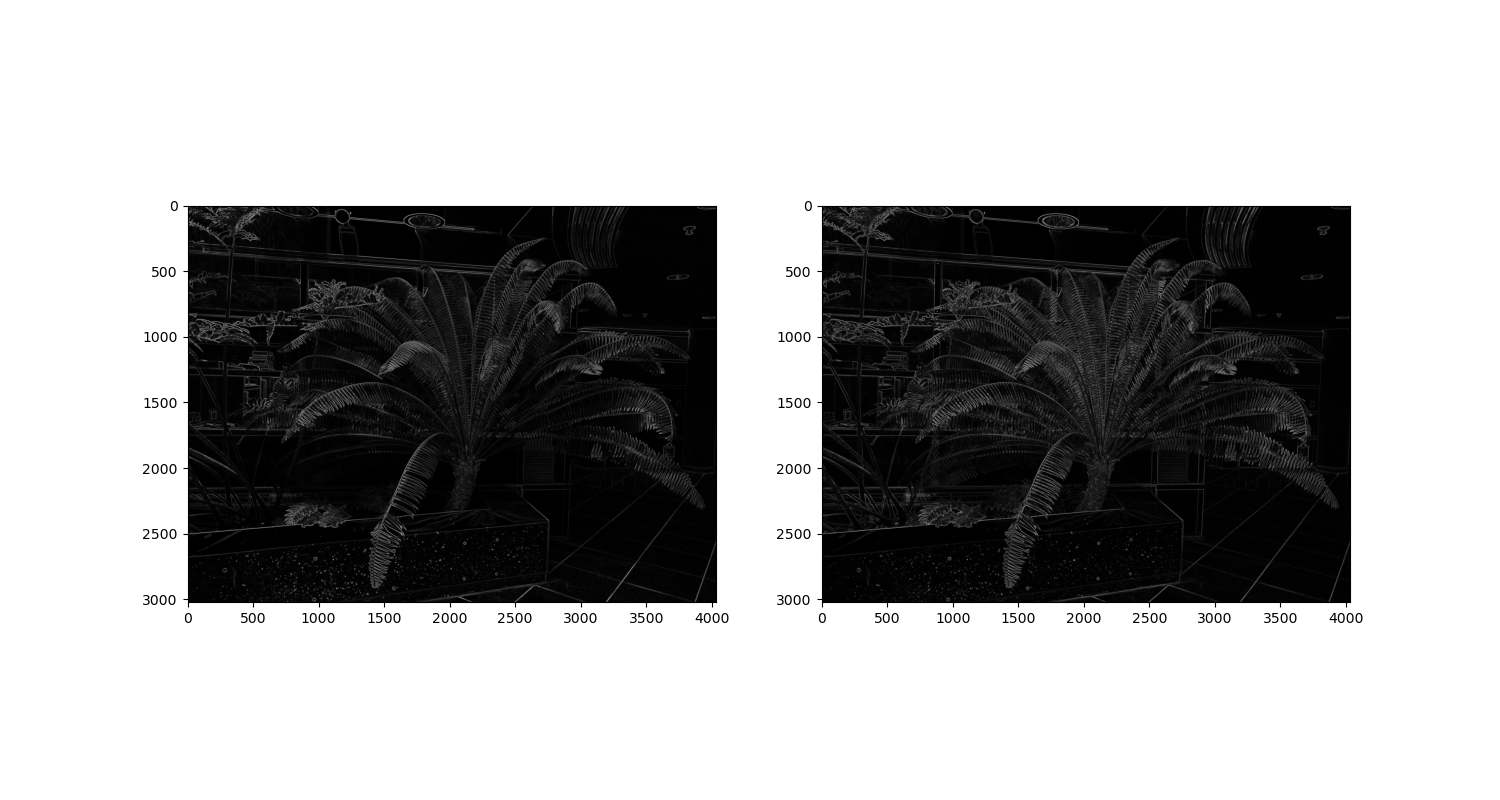

In [6]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.imshow(np.sum(np.abs(gradient), axis=-1) * mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.sum(np.abs(gradient), axis=-1), cmap='gray')

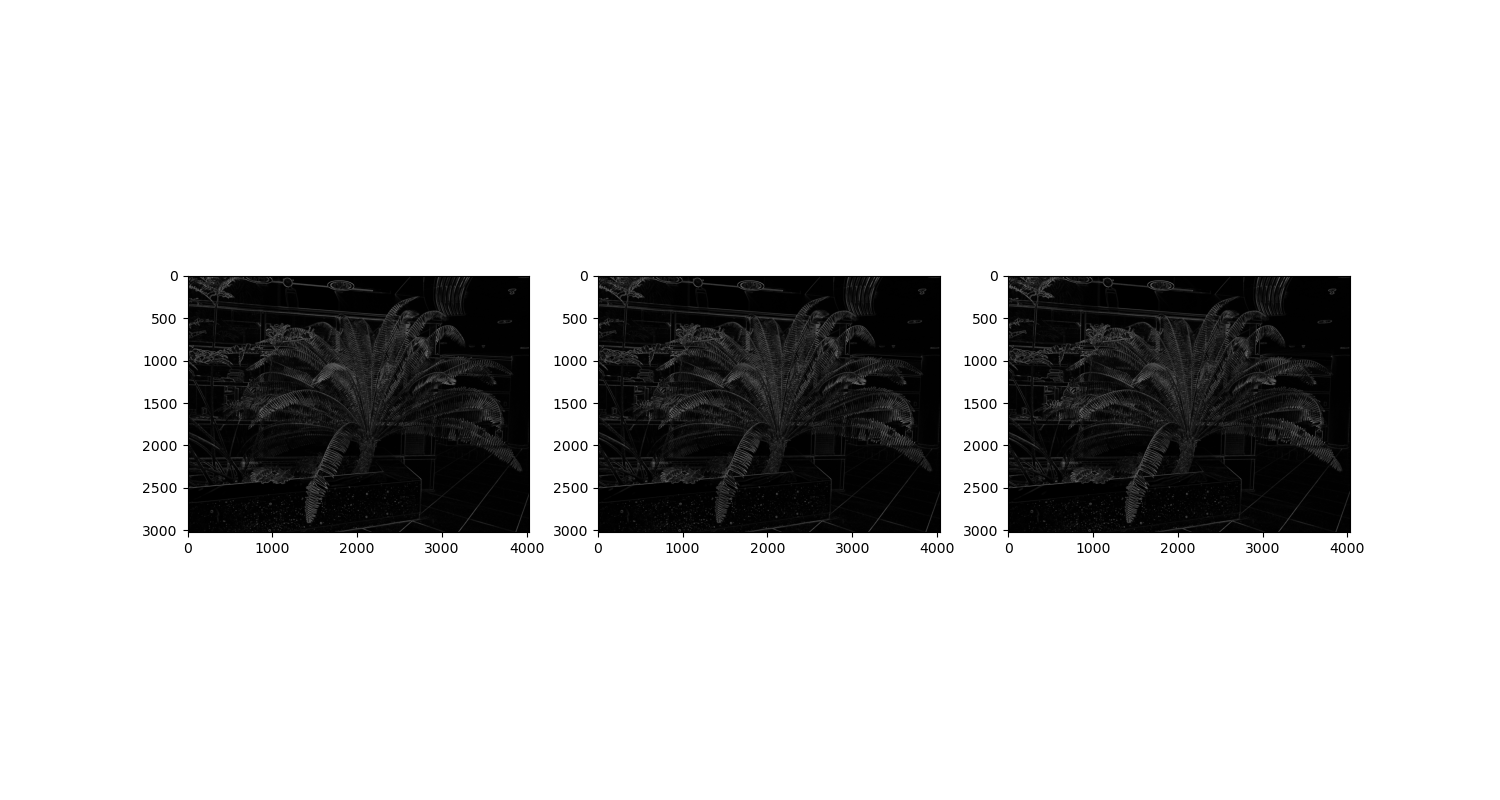

In [7]:
plt.figure(figsize=(15, 8))
plt.subplot(1,3, 1)
plt.imshow(np.abs(gradient[..., 0]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.abs(gradient[..., 1]), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.abs(gradient[..., 2]), cmap='gray')

In [8]:
print(gradient.mean())

666.1465001767168


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


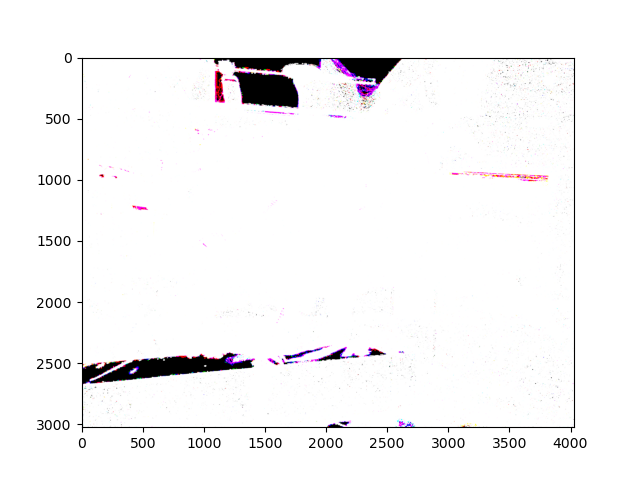

In [9]:
plt.figure()
plt.imshow(gradient, cmap='gray')

In [10]:
weights = gradient.sum(axis=-1)

In [11]:
weights = weights / (np.sum(weights))
weights = (weights - weights.min()) / (weights.max() - weights.min())
print(np.percentile(weights, 5))
print(np.percentile(weights, 95))

0.0010755258126195029
0.2774856596558318


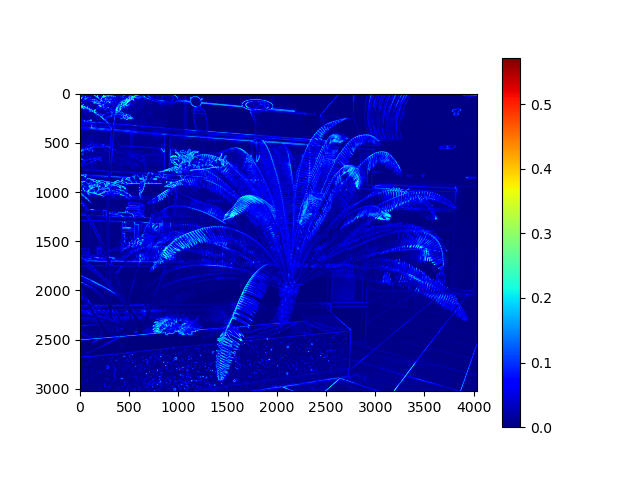

In [12]:
plt.figure()
plt.imshow(weights * mask, cmap='jet')
plt.colorbar()
plt.show()

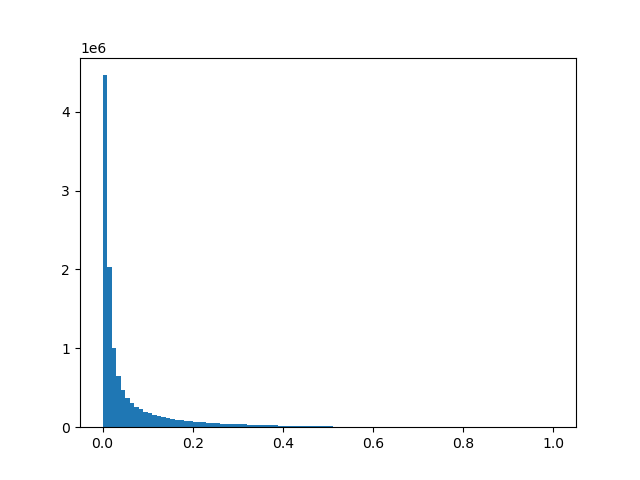

In [18]:
plt.figure()
n, bins, patches = plt.hist(x=weights.ravel(), bins=100)

In [14]:
print(weights.mean())
print(weights.std())

0.059704812993850206
0.09857689839186302
